<a href="https://colab.research.google.com/github/arsan13/data-science/blob/main/LogisticRegression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression - Titanic Dataset**

In [1]:
!git clone https://github.com/plotly/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 3103, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3103 (delta 21), reused 178 (delta 17), pack-reused 2913
Receiving objects: 100% (3103/3103), 351.03 MiB | 23.35 MiB/s, done.
Resolving deltas: 100% (373/373), done.
Checking out files: 100% (1083/1083), done.


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### **1. Collect Data**

In [3]:
df = pd.read_csv('/content/datasets/titanic.csv')

### **2. Understanding/Analysing Data**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(156, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,156.0,78.500000,45.177428,1.00,39.75000,78.5000,117.25000,156.0
Survived,156.0,0.346154,0.477275,0.00,0.00000,0.0000,1.00000,1.0
Pclass,156.0,2.423077,0.795459,1.00,2.00000,3.0000,3.00000,3.0
Age,126.0,28.141508,14.613880,0.83,19.00000,26.0000,35.00000,71.0
SibSp,156.0,0.615385,1.056235,0.00,0.00000,0.0000,1.00000,5.0
Parch,156.0,0.397436,0.870146,0.00,0.00000,0.0000,0.00000,5.0
Fare,156.0,28.109587,39.401047,6.75,8.00315,14.4542,30.37185,263.0


In [8]:
df.groupby('Survived').size()

Survived
0    102
1     54
dtype: int64

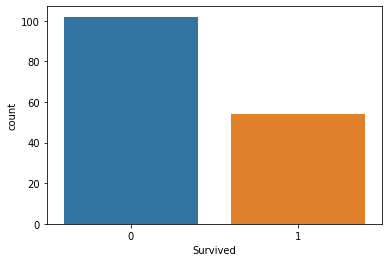

In [9]:
sns.countplot(x="Survived", data=df)

In [10]:
df.groupby(by=['Sex', 'Survived']).size()

Sex     Survived
female  0           16
        1           40
male    0           86
        1           14
dtype: int64

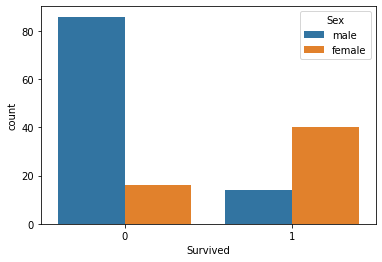

In [11]:
sns.countplot(x="Survived", hue="Sex", data=df)

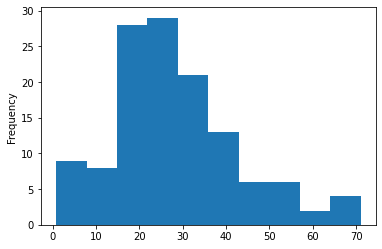

In [12]:
df['Age'].plot.hist()

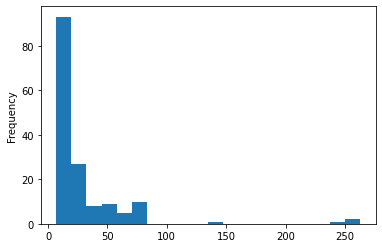

In [13]:
df['Fare'].plot.hist(bins=20)

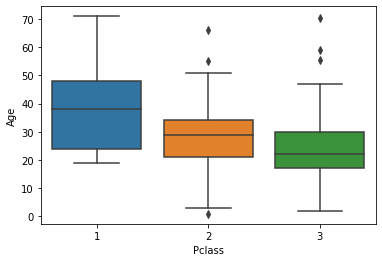

In [14]:
sns.boxplot(x="Pclass", y="Age", data=df)

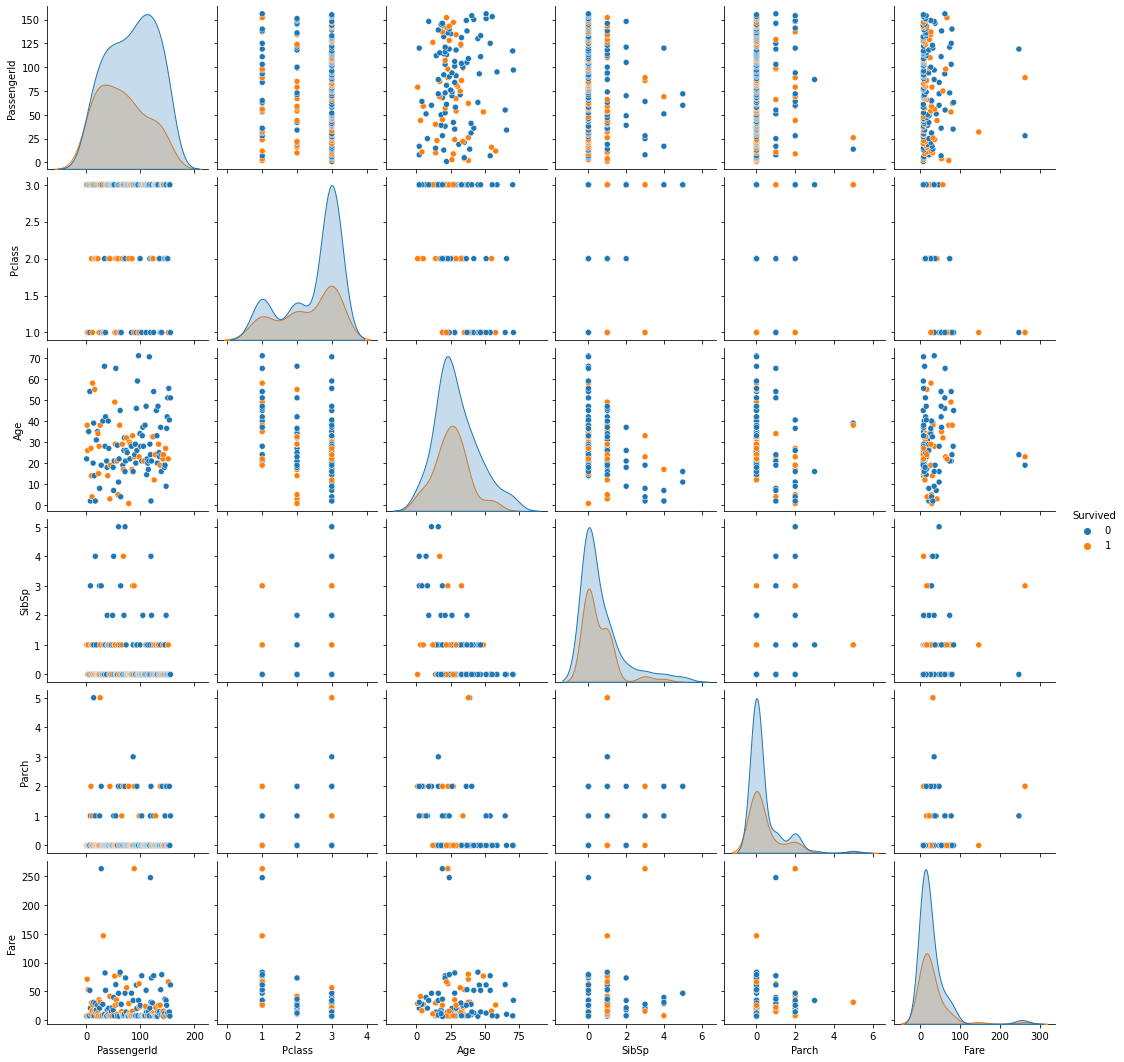

In [15]:
sns.pairplot(df, diag_kind='kde', hue='Survived')

### **3. Wrangling/Cleaning Data**

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

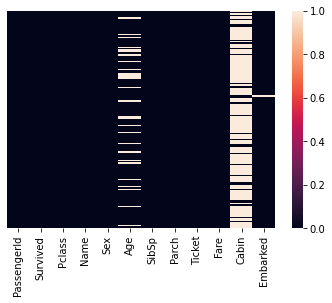

In [17]:
sns.heatmap(df.isnull(), yticklabels=False)

In [18]:
# Handle null values
# df.dropna(inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

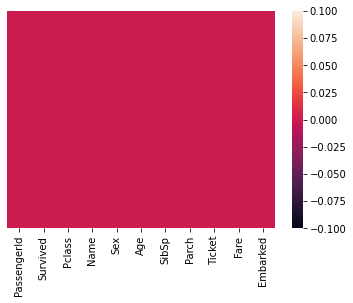

In [20]:
sns.heatmap(df.isnull(), yticklabels=False)

In [21]:
df.shape

(155, 11)

In [22]:
# Convert numerical values to categoricali->binary
gender = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
pcl = pd.get_dummies(df['Pclass'], drop_first=True)
df = pd.concat([df, gender, embark, pcl], axis=1)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [24]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Sex', 'Pclass', 'Name', 'Ticket'], axis=1, inplace=True)

In [25]:
df.drop(['Fare'], axis=1, inplace=True)

In [26]:
df.drop(['Embarked'], axis=1, inplace=True)

In [27]:
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### **4. Train & Test Data**

In [28]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = lr.predict(x_test)

### **5. Performance**

In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.60      0.67      0.63         9

    accuracy                           0.82        39
   macro avg       0.75      0.77      0.76        39
weighted avg       0.83      0.82      0.82        39



In [35]:
confusion_matrix(y_test, y_pred)

array([[26,  4],
       [ 3,  6]])

In [36]:
accuracy_score(y_test, y_pred)

0.8205128205128205